In [1]:
EASY_MODE = True

MODE = "he-to-en"
END = ';'  
MAX_OUTPUT_LENGTH = 50 if not EASY_MODE else 20
REPORT_FREQ       = 100    

## Step1.  전처리

In [2]:
import numpy as np
from collections import defaultdict
word_to_translation = defaultdict(list)

with open("main_dataset.txt") as fin:
    for line in fin:
        en, he = line[:-1].lower().replace(END,' ').split('\t')
        word, trans = (he,en) if MODE=='he-to-en' else (en,he)
        if EASY_MODE:
            if max(len(word), len(trans)) > 20:
                continue
        word_to_translation[word+END].append(trans+END)
print("size = ", len(word_to_translation))



size =  130699


In [3]:
# 소스 언어에서 모든 유니크한 문자를 구하자(a.k.a 소스 사전)
all_words = list(word_to_translation.keys())
source_letters = list(set(''.join(all_words)))
source_to_ix = {l:i for i,l in enumerate(source_letters)}
print(source_to_ix)

{'ל': 0, 'г': 1, 'ل': 2, 'ت': 3, '*': 4, 'ַ': 5, 'گ': 6, 'k': 7, 'ִ': 8, 'خ': 9, 'ц': 10, 'g': 11, '-': 12, 'チ': 13, '½': 14, 'þ': 15, 'ع': 16, 'ъ': 17, '♯': 18, 'س': 19, 'ю': 20, '仙': 21, 'а': 22, 'q': 23, 'צ': 24, 'ֵ': 25, '¡': 26, '\\': 27, 'ظ': 28, 'ö': 29, '²': 30, '6': 31, 'ﭺ': 32, 'с': 33, 'р': 34, 't': 35, 'ک': 36, 'к': 37, 'と': 38, 'o': 39, '–': 40, '+': 41, 'x': 42, '•': 43, 'ذ': 44, 'י': 45, 'ּ': 46, 'マ': 47, 'غ': 48, 'ס': 49, 'z': 50, 'ě': 51, '7': 52, '−': 53, 'ב': 54, 'и': 55, 'ө': 56, '×': 57, 'ø': 58, 'ҙ': 59, 'в': 60, 'ê': 61, 'ם': 62, '″': 63, 'ŭ': 64, 'ѯ': 65, 'ֿ': 66, 'ŝ': 67, 'ף': 68, '0': 69, 'ش': 70, 'b': 71, '!': 72, 'ĉ': 73, 'מ': 74, '8': 75, 'з': 76, 'ѓ': 77, '御': 78, 'f': 79, '·': 80, 'х': 81, 'ấ': 82, 'ץ': 83, 'ĝ': 84, 'щ': 85, 'ח': 86, 'l': 87, '#': 88, 'ָ': 89, 'あ': 90, 'ы': 91, 'ç': 92, 'ا': 93, '2': 94, '白': 95, '桜': 96, 'ש': 97, "'": 98, 'p': 99, 'ぺ': 100, 'ﭪ': 101, 'т': 102, 'ג': 103, 'ж': 104, 'פ': 105, 'ñ': 106, 'è': 107, '4': 108, '/': 109, 'ױ': 110

In [4]:
#타켓 언어에서 모든 유니크한 문자를 구하자
all_translations = [ts for all_ts in word_to_translation.values() for ts in all_ts]
target_letters = list(set([l for ts in all_translations for l in ts] + [" "]))
target_to_ix = {l:i for i,l in enumerate(target_letters)}
print(target_letters)

['ל', 'ل', 'ت', '*', 'ļ', 'ら', 'k', 'ẓ', 'ŏ', 'υ', 'ù', '→', 'ę', 'ṇ', 'ζ', 'g', '≤', 'ή', '-', 'チ', '½', 'ц', 'þ', '^', 'ư', 'ع', 'ģ', 'ъ', 'ț', 'س', 'ю', 'ı', 'ả', '仙', 'ą', 'ņ', 'ş', 'а', 'î', 'q', '¡', 'צ', 'ḥ', 'ö', 'ï', '²', '6', 'ä', 'р', 't', 'đ', 'ν', 'ک', 'å', 'と', 'o', 'к', '–', 'δ', 'ð', 'x', '+', 'ớ', '•', 'ô', 'י', 'マ', 'ס', 'ħ', 'z', 'ě', '7', '−', 'ồ', 'ב', 'վ', 'и', '×', 'ø', 'ṯ', 'ê', 'в', 'ם', '″', 'ŭ', 'ŝ', '0', 'ף', 'b', '!', 'ế', '8', 'õ', 'ṃ', 'ĉ', 'מ', 'f', '·', '御', 'ấ', 'ž', 'ĝ', 'ח', 'l', 'ứ', 'ī', '~', 'あ', 'ē', '%', 'ć', 'ḍ', 'ç', 'ا', '2', '白', '桜', 'ы', 'ש', "'", 'p', 'ì', 'ā', 'ぺ', 'ţ', 'т', 'ű', '`', 'ʿ', 'ľ', 'פ', 'ñ', 'è', '4', '/', 'ș', 'ß', ',', 'ú', 'r', '門', '.', 'â', 'j', 'ý', '—', 'ق', 'ź', 'ر', 'ÿ', 'ó', 'я', 'ɱ', 'ų', 'ա', '′', '$', 'ë', 'א', 'e', 'נ', 'š', '1', 'ă', 'ỹ', 'ր', 'ť', 'ō', 'ż', 'ן', 'v', 'τ', 'η', ';', 'œ', 'û', 'w', 'u', '&', 'л', 'ạ', '"', 'ỏ', 'п', 'ộ', 'ő', 'ь', 'ק', '猫', 'm', 'ד', '3', 'コ', '熊', 'կ', '9', 'c', 'ò', 'ķ', '=',

In [5]:
#특별한 토근들
PAD_ix=-1
EOS_ix_source=source_letters.index(END)
EOS_ix_target=target_letters.index(END)
BOS_ix_target = target_letters.index(" ")

작업의 범위를 예측하기위해 단어/번역 길이 분포를 그리자


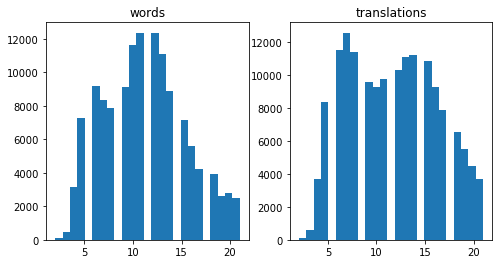

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.title("words")
plt.hist(list(map(len,all_words)),bins=25);

plt.subplot(1,2,2)
plt.title('translations')
plt.hist(list(map(len,all_translations)),bins=25);


## 두번째 단계: 보조 함수들
몇가지 헬퍼 함수가 필요하다:
- 문자열로부터 데이타를 정수 행렬들로 바꾸기
- 샘플 랜덤 미니배치

In [7]:
def as_matrix(sequences, token_to_i, max_len=None, PAX_ix=PAD_ix):
    """
    가변 길이 토근 시퀀스를 고정된 크기의 행렬로 바꾸자.
    사용 예제:
    >>>print( as_matrix(words[:3],source_to_ix))
    [[15 22 21 28 27 13 -1 -1 -1 -1 -1]
     [30 21 15 15 21 14 28 27 13 -1 -1]
     [25 37 31 34 21 20 37 21 28 19 13]]
    """
    
    max_len = max_len or max(map(len, sequences))
    
    matrix = np.zeros((len(sequences), max_len), dtype='int32') + PAD_ix
    for i,seq in enumerate(sequences):
        row_ix = list(map(token_to_i.get, seq))[:max_len]
        matrix[i,:len(row_ix)] = row_ix
    
    return matrix

In [8]:
import random
def sample_batch(words, word_to_translation, batch_size):
    """
    각 단어에 대해 단어와 랜덤한 올바른 번역의 랜덤 배치를 샘플링하기
    예제 사용법:
        batch_x, batch_y = sample_batch(train_words, word_to_translations, 10)
    """
    
    #단어들 선택하기
    batch_words = np.random.choice(words, size=batch_size)
    
    #번역 선택하기
    batch_trans_candidates = list(map(word_to_translation.get, batch_words))
    batch_trans = list(map(random.choice, batch_trans_candidates))
    
    return as_matrix(batch_words,source_to_ix), as_matrix(batch_trans,target_to_ix)

### 데이터 셋 자르기
모든 단어의 20프는 확인(validation)를 위해 사용질 것이다.

In [9]:
from sklearn.cross_validation import train_test_split
train_words,test_words = train_test_split(all_words,test_size=0.1,random_state=42)

/hanmail/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 3단계: encoder-decoder를 생성하기
아키텍쳐는 두개의 주요 블록으로 구성된다:
-- Encoder는 단어들을 문자로 읽고 코드 벡터를 리턴한다.(일반적으로 마지막 RNN 상태의 함수)
-- Decoder는 그 코드 벡터를 가지고 문자단위로 번역을 리턴한다

이 섹션에서 encoder를 구현할것이다.

In [10]:
import theano
import theano.tensor as T

import lasagne
from lasagne.layers import *

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is enabled with initial size: 95.0% of memory, cuDNN 5105)


In [11]:
def get_mask_by_eos(is_eos):
    """ "지금 부터 끝이다"의 표시를 가지고, mask를 리턴한다. 
    첫번째 마지막이후로 모든것을 무시한다. 
    [[False,False,True,True]] -> [[1,1,1,0]]
    """
    assert is_eos.ndim==2
    is_right_after_eos = T.concatenate([T.zeros_like(is_eos[:,:1]),is_eos[:,:-1]],-1)
    is_after_eos = T.eq(T.cumsum(is_right_after_eos,axis=-1), 0).astype('uint8')
    return is_after_eos


In [12]:
class encoder:
    #input tokens and mask
    input_sequence = T.matrix('token sequence', 'int32')
    #T.eq([[1,2,3,5]], 5) -> [[False, False, False, True]]
    input_mask = get_mask_by_eos(T.eq(input_sequence, EOS_ix_source))
    
    inp = InputLayer(shape=(None, None),input_var=input_sequence,name='encoder input')
    mask = InputLayer(shape=(None, None), input_var=input_mask)
    
    #embedding
    emb = EmbeddingLayer(inp,
                         input_size=len(source_letters),
                         output_size=50)
    
    #encoder rnn
    rnn = GRULayer(incoming=emb,
                   num_units=512,
                   mask_input=mask)
    
    #slice last time-step of encoder rnn
    rnn_last = SliceLayer(rnn,-1,axis=1,name='last rnn time-step')
    
    #compute decoder initial state
    code = DenseLayer(rnn_last,512,nonlinearity=T.tanh)

## Decoder
In this section, we will define one step of decoder (just like we defined one step of agent last week)

In [13]:
from agentnet.memory import RNNCell,GRUCell,LSTMCell
from agentnet.resolver import ProbabilisticResolver

In [14]:
class decoder:
    """single step of decoder rnn"""
    
    inp = InputLayer((None,),name="prev phoneme")
    
    emb = EmbeddingLayer(inp, len(target_letters), 50)
    
    #decoder memory
    prev_gru = InputLayer((None,512))
    
    gru = GRUCell(prev_gru, emb) #use shift-tab to figure out what goes here
    
    logits = DenseLayer(gru,len(target_letters),nonlinearity=None)
    
    #probabilities
    probs = NonlinearityLayer(logits,T.nnet.softmax)
    
    #output phonemes
    out = ProbabilisticResolver(probs,assume_normalized=True)
    
    #log-probabilities
    logprobs = NonlinearityLayer(logits,T.nnet.logsoftmax)

## Wire it all together
Here we define functions for model inference (both greedy and sampled).

In [15]:
from agentnet import Recurrence
from collections import OrderedDict as od
class model:
    # 추론을 위한 최대 결과 크기
    n_steps = theano.shared(MAX_OUTPUT_LENGTH)
    
    #특별한 음소 "START"를 인덱스
    l_start = InputLayer((None,),T.zeros_like(encoder.input_sequence[:,0])+BOS_ix_target)

    #recurrence를 정의하자: 커스텀 recurrence 레이어, lasagne 레이어라는 것만 제외하면 
    #정확하게 Agent처럼 동작한다.
    
    rec = Recurrence(
        #recurrent states
        state_variables=od({decoder.gru:decoder.prev_gru,
                            decoder.out:decoder.inp}),
        
        #initial values for recurrent states
        state_init={decoder.out:l_start,
                    decoder.gru:encoder.code,},
        
        tracked_outputs=(decoder.out,decoder.probs,decoder.logprobs),
        
        unroll_scan=False,
        n_steps=n_steps
    )
    
    weights = get_all_params(rec,trainable=True)
    
    #sample mode
    predicted_translations,probs_seq,logprobs_seq = get_output(rec[decoder.out,decoder.probs,decoder.logprobs])
    auto_updates = rec.get_automatic_updates()

    #output mask
    mask = get_mask_by_eos(T.eq(predicted_translations,EOS_ix_target))
    
    generate_sample = theano.function([encoder.input_sequence],predicted_translations,
                                      updates=auto_updates)
    
    #greedy mode (picking max-probability actions on each step)
    greedy_translations = get_output(rec[decoder.out],recurrence_flags={"greedy":True})
    greedy_auto_updates = rec.get_automatic_updates()
    
    greedy_mask = get_mask_by_eos(T.eq(greedy_translations,EOS_ix_target))
    
    
    generate_greedy = theano.function([encoder.input_sequence],greedy_translations,
                                       updates=greedy_auto_updates)
    
    @staticmethod
    def translate(word,sample=False):
        assert word.endswith(END)
        
        #convert to matrix
        word_ix = as_matrix([word.lower()],source_to_ix)
        
        #generate output
        if sample:
            trans_ix = model.generate_sample(word_ix)[0]
        else:
            trans_ix = model.generate_greedy(word_ix)[0]
        
        #convert from int32 to string
        trans = list(map(target_letters.__getitem__,trans_ix))
        
        #crop padding
        if END in trans:
            trans = trans[:trans.index(END)+1]
            
        return ''.join(trans)



In [16]:
#test untrained model
#should be random
print ('x:'+all_words[0])
print ('y_sampled:'+model.translate(all_words[0],sample=True))
print ('y_greedy:'+model.translate(all_words[0]))
#praise Cthulhu!


x:אנרכיזם;
y_sampled:ḫ仙لղếěťصů`ả?ēա½זţęרů
y_greedy:ккккōō9óн=ģ守守i8ע-iṃh


### Score 함수
LogLikelihood는 모델 성능 평가에 좋지 않다.
- 제로 확률이 한번 예측 되면, 전체 모델을 망치지 말아야 한다.
- 여러개의 바른 답이 있다면 단지 하나의 번역을 배우는 것만으로 충분하다.
- 한 단계마다 가장 있을법한 음소를 가지는지 출력해???

그러므로, 우리는 최소 Levenshten distance를 사용할 것이다.

In [17]:
import editdistance

def get_distance(word, trans):
    """
    워드와 예측된 번역을 입력으로 하고 바른 번역에 얼마나 가까운지 edit distance를 평가한다.
    """
    #print(word)
    references = word_to_translation[word]
    #print(references)
    #print(trans)
    assert len(references) !=0, "word/unknown word"
    return min(editdistance.eval(trans, ref) for ref in references)

In [18]:
def score(bsize=100):
    """
    bszie의 랜덤 샘플에 대해 levenshtein distance를 계산하는 함수
    """
    batch_words = np.random.choice(test_words, size=(bsize,)) 
    #for word in batch_words:
    #    print(word)
    predictions = [model.translate(word) for word in batch_words]
    #for p in predictions:
    #    print(p)
    #print(predictions)
    distances = [get_distance(word, prediction) for (word, prediction) in zip(batch_words, predictions)]    
    return np.array(distances,dtype='float32')   

In [19]:
#should be around 5-50 and decrease rapidly :)
[score(100).mean() for _ in range(10)]

[19.719999,
 19.799999,
 19.620001,
 19.65,
 19.780001,
 19.549999,
 19.85,
 19.5,
 19.639999,
 19.879999]

## Step 4: Supervised pre-training
여기에서 로그 우도를 최대화 함으로써 모델을 학습하는 함수를 정의하자.

In [20]:
from agentnet.learning.generic import get_values_for_actions

class llh_trainer:

    #정답에 대한 변수
    reference_answers = T.imatrix("reference translations")
    
    #이전 답을 얻기위해 이전으로 한단계 시프트하자
    prev_answers = T.concatenate([T.zeros_like(reference_answers[:,:1])+BOS_ix_target,
                                  reference_answers[:,:-1]],axis=1)
    
    #이전 해답에 대해 마스크하자
    input_mask = get_mask_by_eos(T.eq(prev_answers,EOS_ix_target))
    
    #입력 레이어 만들자
    l_sequence = InputLayer((None,None),prev_answers)
    l_mask = InputLayer((None,None),input_mask)
    
    #teacher-forced 학습
    rec = Recurrence(state_variables=od({decoder.gru:decoder.prev_gru}),
                     input_sequences={decoder.inp:l_sequence},
                     state_init={decoder.gru:encoder.code},
                     tracked_outputs=(decoder.probs,decoder.logprobs),
                     unroll_scan=False,
                     mask_input=l_mask)
    
    
    #로그 확률 얻자
    logprobs_seq = get_output(rec[decoder.logprobs])
    auto_updates = rec.get_automatic_updates()
    
    #mean crossentropy 계한하자
    crossentropy = -get_values_for_actions(logprobs_seq,reference_answers)
    
    loss = T.sum(crossentropy*input_mask)/T.sum(input_mask)
    
    #get all params
    weights = get_all_params(rec,trainable=True)
    #print(weights)
    
    #weight updates                 
    updates = lasagne.updates.adam(loss, weights)
    #<compute weight updates>
    
    train_step = theano.function([encoder.input_sequence,reference_answers],loss,
                                 updates=auto_updates+updates)

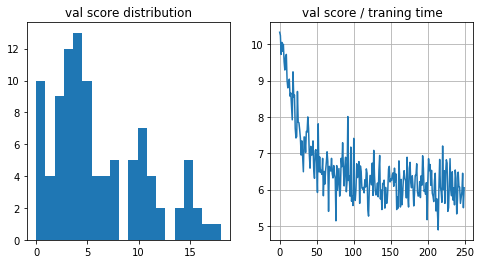

100%|██████████| 25000/25000 [37:05<00:00,  3.73it/s]

llh=0.833, mean score=5.967


In [21]:
from IPython.display import clear_output
from tqdm import tqdm,trange #or use tqdm_notebook,tnrange

loss_history=[]
editdist_history = []

for i in trange(25000):
    loss_history.append(
            llh_trainer.train_step(*sample_batch(train_words,word_to_translation,32)))
    
    if (i+1)%REPORT_FREQ==0:
        clear_output(True)
        current_scores = score()
        editdist_history.append(current_scores.mean())
        plt.figure(figsize=(8,4))
        plt.subplot(121)
        plt.title('val score distribution')
        plt.hist(current_scores, bins = 20)
        plt.subplot(122)
        plt.title('val score / traning time')
        plt.plot(editdist_history)
        plt.grid()
        plt.show()
        print("llh=%.3f, mean score=%.3f"%(np.mean(loss_history[-10:]),np.mean(editdist_history[-10:])))

In [23]:
for word in train_words[:10]:
    print("%s -> %s"%(word,model.translate(word)))

עלי נאסר; -> ali nassar;
קטגוריה:בלפסט; -> bellpsp;
ארבינקא; -> arbinka;
זיכרון נוהלי; -> nector of denmali;
scar tissue; -> scar tisco;
עמק האלבה בדרזדן; -> arabsed stadium;
ז'ורז' בולנז'ה; -> georges bullange;
מילקן; -> milken;
כביש 73; -> highway 73;
אלין; -> ellin;


## Step 5: 정책 그라디언트(Policy gradient )

우선 커스텀 theano 연산으로 손실(loss) 함수를 정의 할 필요가 있다.

그렇게 하는 간단한 방법은 아래와 같다.

    @theano.compile.as_op(input_types,output_type(s),infer_shape)
    def my_super_function(inputs):
        return outputs

우리 작업은 단어와 번역 행렬들을 입력으로 가지고 그것들을 실제 단어 그리고 음절로 변환하고 위에 get_distance 함수를 통해서 min-levenshtein를 계산하는 _compute_levenshtein을 구현하는 것이다.

In [24]:
@theano.compile.as_op([T.imatrix]*4,[T.fvector],lambda _,shapes: [shapes[0][:1]])
def _compute_levenshtein(words_ix,words_mask,trans_ix,trans_mask):
    """
    예측된 번역에 대한 levenshtein 손실을 계산하는 커스텀 theano 연산이다.
    
    Params:
    - words_ix - 문자 인덱스 행렬, shape=[batch_size, word_length]
    - words_mask - 0과1로 구성된 행렬,
        1은 단어는 아직 끝나지 않았음을 의미한다.
        0은 단어는 이미 끝나고 이것은 패딩이다는 것을 의미한다.
    -trans_ix - 결과 문자 인덱스 행렬, shape=[batch_size,translation_length]
    -trans_mask - 0과1로 구성된 행렬 word_mask와 유사하다. 그러나 tans_ix를 위한 것이다.
    
    """
    
    #convert words to strings
    #<your code here>
    words = []
    for i, letters_ix in enumerate(words_ix):
        word = ''.join([source_letters[letter_ix] for letter_ix in letters_ix][:sum(words_mask[i])])
        words.append(word)
        
    #<restore words (a list of strings) from words_ix and words_mask>

    assert type(words) is list
    assert type(words[0]) is str 
    assert len(words)==len(words_ix)
    
    #convert translations to lists    
    translations = []
    for i, tran_ix in enumerate(trans_ix):
        tran = ''.join([target_letters[letter_ix] for letter_ix in tran_ix][:sum(trans_mask[i])])
        translations.append(tran)
    
        
    assert type(translations) is list
    assert type(translations[0]) is str
    assert len(translations)==len(trans_ix)

    #computes levenstein distances. can be arbitrary python code.
    distances = [get_distance(w,t) for w, t in zip(words, translations)]
    #<apply get_distance to each pair of [words,translations]>
    
    assert type(distances) in (list,tuple,np.ndarray) and len(distances) == len(words_ix)
    
    distances = np.array(list(distances),dtype='float32')
    return distances

#forbid gradient
from theano.gradient import disconnected_grad
def compute_levenshtein(*args):
    return disconnected_grad(_compute_levenshtein(*[arg.astype('int32') for arg in args]))

In [25]:
#test suite
#sample random batch of (words, correct trans, wrong trans)
batch_words = np.random.choice(train_words, size=100 )
batch_trans = list(map(random.choice,map(word_to_translation.get,batch_words )))
batch_trans_wrong = np.random.choice(all_translations,size=100)

batch_words_ix = T.constant(as_matrix(batch_words,source_to_ix))
batch_trans_ix = T.constant(as_matrix(batch_trans,target_to_ix))
batch_trans_wrong_ix = T.constant(as_matrix(batch_trans_wrong,target_to_ix))

batch_words_mask = get_mask_by_eos(T.eq(batch_words_ix,EOS_ix_source))
batch_trans_mask = get_mask_by_eos(T.eq(batch_trans_ix,EOS_ix_target))
batch_trans_wrong_mask = get_mask_by_eos(T.eq(batch_trans_wrong_ix,EOS_ix_target))

In [26]:
#assert compute_levenshtein is zero for ideal translations
correct_answers_score = compute_levenshtein(batch_words_ix,batch_words_mask,
                                            batch_trans_ix,batch_trans_mask).eval()

assert np.all(correct_answers_score==0),"a perfect translation got nonzero levenshtein score!"

print("Everything seems alright!")

Everything seems alright!


In [27]:
#assert compute_levenshtein matches actual scoring function
wrong_answers_score = compute_levenshtein(batch_words_ix,batch_words_mask,
                                            batch_trans_wrong_ix,batch_trans_wrong_mask).eval()

true_wrong_answers_score = np.array(list(map(get_distance,batch_words,batch_trans_wrong)))

assert np.all(wrong_answers_score==true_wrong_answers_score),"for some word symbolic levenshtein is different from actual levenshtein distance"

print("Everything seems alright!")

Everything seems alright!


## Self-critical policy gradient
이 섹션에서, self-critical sequence학습이라고 하는 알고리즘을 구현할 것이다.
이 알고리즘은 특별한 베이스라인을 가진 바닐라 정책 그라디언트이다.

$$ \nabla J = E_{x \sim p(s)} E_{y \sim \pi(y|x)} \nabla log \pi(y|x) \cdot (R(x,y) - b(x)) $$

여기서 R(x,y)는 네가티브 levenshtein distance 이다(그것을 최소화 하기 때문이다). 베이스라인 b(x)는 단어 x에 대하 모델이 얼마나 되는지 나타낸다. 실제적으로, 이것은 그라디(greedy) 번역 점수로써 베이스라인을 계산한다는 것을 의미한다, $b(x) = R(x,y_{greedy}(x)) $.
운좋게, 요구되는 결과를 이미 얻었다:
model.greedy_translations, model.greedy_mask 그리고 단지 compute_levenshtein함수를 사용해서 levenshtein를 계산할 필요가 있다. 

In [28]:
from agentnet.learning.generic import get_values_for_actions

class trainer:    
    
    rewards = -compute_levenshtein(encoder.input_sequence,encoder.input_mask,
                                   model.predicted_translations,model.mask)
    
    baseline = -compute_levenshtein(encoder.input_sequence,encoder.input_mask,
                                   model.greedy_translations,model.greedy_mask)

    #<compute __negative__ levenshtein for greedy mode>
    
    #compute advantage using rewards and baseline
    advantage = rewards - baseline #<your code - compute advantage>
    
    
    #compute log_pi(a_t|s_t), shape = [batch,seq_length]
    phoneme_logprobs = get_values_for_actions(model.logprobs_seq, model.predicted_translations)
    
    #policy gradient
    J = phoneme_logprobs*advantage[:,None]
    
    loss = -T.sum(J*model.mask) / model.mask.sum()
    
    
    #regularize with negative entropy
    phoneme_probs = get_values_for_actions(model.probs_seq, model.predicted_translations)
    entropy = -phoneme_probs*phoneme_logprobs
    #<compute entropy matrix of shape [batch,seq_length], H=-sum(p*log_p), don't forget the sign!>

    loss -= 0.01*(model.mask*entropy).sum() / model.mask.sum()
    
    
    # Compute weight updates, clip by norm
    grads = T.grad(loss,model.weights)
    grads = lasagne.updates.total_norm_constraint(grads,10)

    updates = lasagne.updates.adam(grads, model.weights,learning_rate=1e-5) 

    train_step = theano.function([encoder.input_sequence],loss,
                                 updates = model.auto_updates+model.greedy_auto_updates+updates)

## 정책 그라디언트 학습(Policy gradient training)

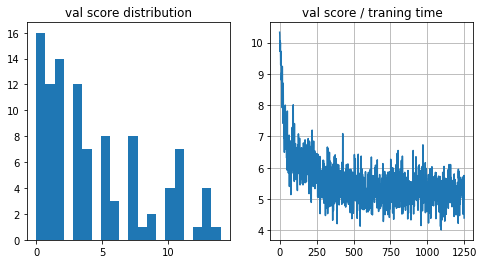

100%|██████████| 100000/100000 [2:55:39<00:00,  3.49it/s]

J=-0.526, mean score=5.101


In [29]:
for i in trange(100000):
    loss_history.append(
        trainer.train_step(sample_batch(train_words,word_to_translation,32)[0])
        )
    
    if (i+1)%REPORT_FREQ==0:
        clear_output(True)
        current_scores = score()
        editdist_history.append(current_scores.mean())
        plt.figure(figsize=(8,4))
        plt.subplot(121)
        plt.title('val score distribution')
        plt.hist(current_scores, bins = 20)
        plt.subplot(122)
        plt.title('val score / traning time')
        plt.plot(editdist_history)
        plt.grid()
        plt.show()
        print("J=%.3f, mean score=%.3f"%(np.mean(loss_history[-10:]),np.mean(editdist_history[-10:])))

## 결과

In [30]:
model.translate("EXAMPLE;")

'example;'

In [ ]:
#predicted_translations = list(map(model.translate,tqdm(test_words)))
#distances = map(get_score,test_words,predicted_translations)

#print ("Mean Levenshtein distance:",np.mean(distances))
#print ("Median Levenshtein distance:",np.median(distances))
#plt.hist(distances,range=[0,10]);